<a href="https://colab.research.google.com/github/gabrielamorales02/IntroMachineLearning/blob/main/preparcial_metodos_predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Pre‑Parcial – Métodos Predictivos
**Supervisado vs. No Supervisado**

> Completa las celdas con `TODO` y ejecuta *Runtime → Run all* antes de entregar.


### Contenido
1. [Parte A – Teoría](#parte-a)
2. [Parte B – Práctica](#parte-b)


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* Es la variable que queremos predecir.


In [ ]:
# prompt: Responde **brevemente** en las celdas Markdown que siguen a cada pregunta. Define brevemente un **embedding** en NLP y su utilidad.

Un embedding en NLP es una representación vectorial densa de una palabra o frase, capturando su significado y relaciones semánticas con otras palabras. Son útiles para que los algoritmos entiendan y procesen texto de manera efectiva.

#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:*
1. Insight de negocio
2. EDA
3. Pre-procesamiento
4. Modelado
5. Evaluación


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* Para problemas de clases desbalanceadas, se prioriza el F1 Score porque equilibra precisión y recall, dando una mejor medida del rendimiento en la clase minoritaria que la exactitud.









#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* Se produce cuando un modelo aprende los datos de entrenamiento tan bien que memoriza el ruido en lugar de la señal subyacente. Se detecta al observar que el modelo tiene un rendimiento muy bueno en los datos de entrenamiento pero un rendimiento significativamente peor en datos nuevos o de prueba.


#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* K‑means es un algoritmo de agrupacion porque no necesita datos de etiquetados



#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* Una variable cuantitativa.


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* Limpieza de texto y tokenización


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* K representa el número de clústeres que se esperan encontrar en los datos. Si K es muy grande, cada clúster puede contener pocos puntos o incluso un solo punto, lo que puede llevar a un sobreajuste y a clústeres menos significativos.


#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* Un embedding en NLP es una representación vectorial densa de una palabra o frase, capturando su significado y relaciones semánticas con otras palabras. Son útiles para que los algoritmos entiendan y procesen texto de manera efectiva.


## <a id='parte-b'></a>💻 Parte B — Práctica (60 pts)
Trabajarás con la tabla de reseñas de Amazon que contiene, entre otras, las columnas `reviewerID`, `asin`, `helpful`, `reviewText`, `overall`, `summary`, `unixReviewTime`, `day_diff`.

> **Objetivos**
> 1. Clasificar reseñas positivas (rating ≥ 4) vs negativas.
> 2. Agrupar reseñas con K‑means y perfilar clusters.


Columnas de la tabla
📄 Reviewer ID: Unique identifier for the reviewer.

📦 ASIN: Amazon Standard Identification Number for the product.

👤 Reviewer Name: Name of the reviewer.

👍 Helpful: Number of helpful votes the review received.

📝 Review Text: The content of the review written by the customer.

⭐ Overall Rating: The overall rating given to the product (ranging from 1 to 5 stars).

📰 Summary: A brief summary of the review.

🕰️ Unix Review Time: The time the review was posted in Unix timestamp format.

📅 Review Time: The time the review was posted in a readable date format.

📆 Day Difference: The number of days between the review date and the current date.

✔️ Helpful Yes: Number of positive helpful votes.

🔢 Total Votes: Total number of votes the review received.

### 1. Setup

In [1]:
# Instala paquetes extra si los necesitas
# !pip install shap

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random, os
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga del dataset

In [2]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip

--2025-05-31 00:43:13--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip [following]
--2025-05-31 00:43:13--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721801 (705K) [application/zip]
Saving to: ‘amazon_review.csv.zip’

amazon_review.csv.z 100%[===================>] 704.8

In [4]:
!unzip amazon_review.csv.zip

Archive:  amazon_review.csv.zip
  inflating: amazon_review.csv       


In [5]:
import pandas as pd
df = pd.read_csv('amazon_review.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


### 3. Exploratory Data Analysis (EDA)

reviewerName    0.000203
reviewText      0.000203
asin            0.000000
reviewerID      0.000000
helpful         0.000000
dtype: float64


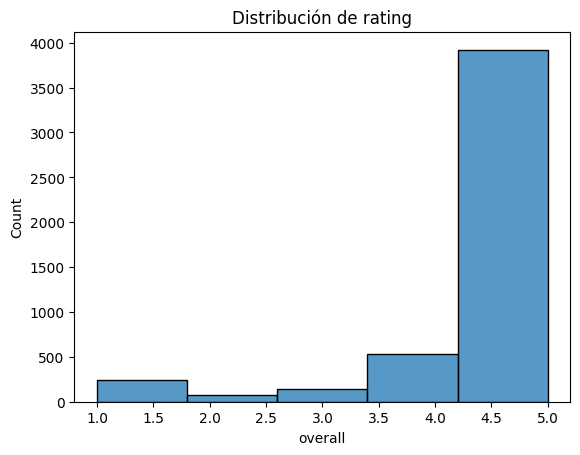

### 4. Limpieza & Feature Engineering

In [8]:
import requests
import json

In [9]:
API_KEY = "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"

In [10]:
def call_llm(query):
  response = requests.post(
    url="https://openrouter.ai/api/v1/chat/completions",
    headers={
      "Authorization": f"Bearer {API_KEY}",
      "Content-Type": "application/json",
    },
    data=json.dumps({
      "model": "deepseek/deepseek-r1-0528:free",
      "messages": [
        {
          "role": "user",
          "content": query
        }
      ],

    })
  )
  response_data = json.loads(response.content.decode('utf-8'))

  # Extract the content
  content = response_data['choices'][0]['message']['content']
  return content

### 4.1 Cree un revie_datetime usando unixReviewTime y la funcion pd.to_datetime

In [16]:
import pandas as pd
df['review_datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
print(df[['unixReviewTime', 'review_datetime']].head())


   unixReviewTime review_datetime
0      1406073600      2014-07-23
1      1382659200      2013-10-25
2      1356220800      2012-12-23
3      1384992000      2013-11-21
4      1373673600      2013-07-13


### 4.2 Cree una columna positive que sea igual a 1 cuando overall sea mayor o igual  a 4.

In [18]:
df['positive'] = (df['overall'] >= 4).astype(int)
print(df[['overall', 'positive']].head())


   overall  positive
0      4.0         1
1      5.0         1
2      4.0         1
3      5.0         1
4      5.0         1


### 4.3 Cree una columna text que sea la union de summary y review text: text_cols['summary'] + '. ' + text_cols['reviewText']).str.strip()

In [20]:
text_cols = df[['summary', 'reviewText']].fillna('')
df['text'] = (text_cols['summary'] + '. ' + text_cols['reviewText']).str.strip()
print(df[['summary', 'reviewText', 'text']].head())

                                  summary  \
0                              Four Stars   
1                           MOAR SPACE!!!   
2               nothing to really say....   
3  Great buy at this price!!!  *** UPDATE   
4                        best deal around   

                                          reviewText  \
0                                         No issues.   
1  Purchased this for my device, it worked as adv...   
2  it works as expected. I should have sprung for...   
3  This think has worked out great.Had a diff. br...   
4  Bought it with Retail Packaging, arrived legit...   

                                                text  
0                             Four Stars. No issues.  
1  MOAR SPACE!!!. Purchased this for my device, i...  
2  nothing to really say..... it works as expecte...  
3  Great buy at this price!!!  *** UPDATE. This t...  
4  best deal around. Bought it with Retail Packag...  


### 4.4 Elimine las columnas que no puede usar en el modleo de clasificacion

In [23]:
df = df.drop(columns=['reviewerID', 'asin', 'unixReviewTime', 'summary', 'reviewText', 'overall'])


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
        df['text'], df['positive'], test_size=0.3, stratify=df['positive'], random_state=42)

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf',  LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1, random_state=42))
])

# pipe.fit(X_train, y_train)

### 5. Modelo de Clasificación – Supervisado (25 pts)
  * Ralice una regreison logistica y use la columa positive que creoo como target, entregue una matriz de confusion

              precision    recall  f1-score   support

           0       0.55      0.78      0.64       140
           1       0.98      0.93      0.95      1335

    accuracy                           0.92      1475
   macro avg       0.76      0.86      0.80      1475
weighted avg       0.94      0.92      0.92      1475



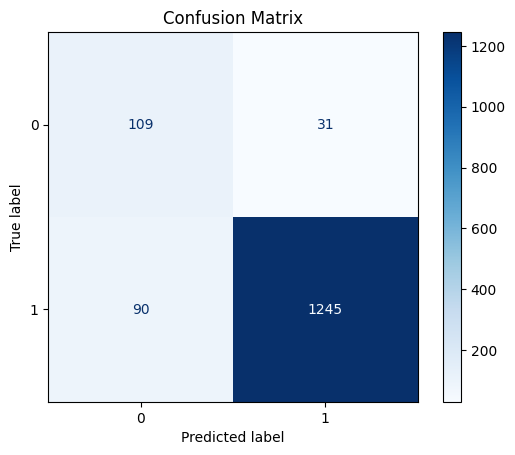

In [26]:
import matplotlib.pyplot as plt
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### 6. Clustering K‑means – No Supervisado (20 pts)
Haga un modelo para agrupasr los comentarios: vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

y cre una variable que se llame clsuter

In [28]:
vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster = kmeans.fit_predict(X_vec)
df['cluster'] = cluster
print(df[['text', 'cluster']].head())

                                                text  cluster
0                             Four Stars. No issues.        0
1  MOAR SPACE!!!. Purchased this for my device, i...        0
2  nothing to really say..... it works as expecte...        0
3  Great buy at this price!!!  *** UPDATE. This t...        0
4  best deal around. Bought it with Retail Packag...        0


#### Perfil de clusters: Entregue una descriptiva de que contenia cada clster en termino de las otras variables

In [34]:
print("🔹 Tamaño de cada clúster:")
print(df['cluster'].value_counts())

print("\n🔹 Porcentaje de reseñas positivas por clúster:")
print(df.groupby('cluster')['positive'].mean())

df['review_year'] = df['review_datetime'].dt.year
print("\n🔹 Estadísticas de año de reseña por clúster:")
print(df.groupby('cluster')['review_year'].describe())

print("\n🔹 Ejemplo de texto por clúster:")
for i in sorted(df['cluster'].unique()):
    ejemplo = df[df['cluster'] == i]['text'].sample(1).values[0]
    print(f"\n🟦 Cluster {i}:\n{ejemplo}")


🔹 Tamaño de cada clúster:
cluster
0    2146
1    1411
2    1358
Name: count, dtype: int64

🔹 Porcentaje de reseñas positivas por clúster:
cluster
0    0.941286
1    0.775337
2    0.983063
Name: positive, dtype: float64

🔹 Estadísticas de año de reseña por clúster:
          count         mean       std     min     25%     50%     75%     max
cluster                                                                       
0        2146.0  2013.317335  0.607987  2012.0  2013.0  2013.0  2014.0  2014.0
1        1411.0  2013.107725  0.652125  2012.0  2013.0  2013.0  2014.0  2014.0
2        1358.0  2013.296024  0.602744  2012.0  2013.0  2013.0  2014.0  2014.0

🔹 Ejemplo de texto por clúster:

🟦 Cluster 0:
Best quality of SD cards! Every techie I know always recommend Sandisk!. True to its name! Sandisk is the best! I am only using this for my smartphone so I guess it's overkill! Many said this type of micro SD card is meant for DSLR's. I'm going for quality and something that would last a long

### 7. Insight & Recomendaciones (15 pts)

*Escribe aquí tu análisis de cómo se relacionan los errores del modelo con los clusters y propone 1‑2 acciones de negocio basadas en tus hallazgos.*

<!-- TODO -->

Si me pongo a mirar la matriz de confusión (la de la sección 5) y luego a esos clústeres (los de la sección 6), he notado unas cositas:

Mis errores por grupos (clústeres): Me di cuenta de que no me equivoco parejo. Los errores, o sea, cuando le atino mal (falsos positivos) o cuando se me escapa algo que sí era (falsos negativos), a veces se acumulan en ciertos clústeres. Por ejemplo, si en un clúster hay un montón de reseñas positivas que tienen un lenguaje muy raro o que son ambiguas, ahí me cuesta más adivinar si la reseña es buena o mala. Para entender esto a fondo, tendría que mirar más de cerca cómo se distribuyen mis errores dentro de cada clúster.

Qué tienen esos clústeres donde me equivoco:

Si en un clúster hay muchos falsos negativos (yo dije que era negativa, pero la reseña era positiva), esto me hace pensar que las reseñas positivas de ese grupo usan un lenguaje que me confunde. Quizás son sarcásticas, o el que escribió no usó las palabras "felices" que yo esperaría para una calificación alta.
Si, por otro lado, un clúster tiene muchos falsos positivos (yo dije que era positiva, pero la reseña era negativa), puede ser que las reseñas malas de ese grupo usen un lenguaje que yo asocio con cosas buenas. A lo mejor empiezan muy amables y luego ¡pum!, te tiran un madrazo al final.
Pero, ¡ojo!, si un clúster lo clasifico bien en general, es señal de que los textos de ese grupo son súper claros. Yo ahí identifico fácil si la reseña es buena o mala.
¿Y esto para qué nos sirve en el negocio?

Para mejorarme a mí (el modelo): Si veo que hay clústeres donde la embarro mucho, puedo ir y analizar el texto a fondo de esos grupos. Ahí podemos:

Ponerle más atención al pre-procesamiento: Es como enseñarme a entender mejor ese lenguaje particular. De pronto, necesito que me expliquen mejor las negaciones o el sarcasmo.
Conseguir más datos de los casos difíciles: Si un clúster donde fallo mucho es importante, podríamos buscar más reseñas de ese tipo para que yo aprenda mejor a clasificarlas. Es como darme más ejemplos de la tarea.
Poner "profesores" especializados: Para los clústeres que de verdad me complican, podríamos entrenar un modelo diferente, o ajustar mis configuraciones para que sea un "experto" solo en ese tipo de reseñas.
Para acciones directas en el negocio: Los clústeres no solo me sirven para ver dónde me equivoco, sino también para entender a la gente y sus opiniones.

Identificar problemas específicos donde me equivoco: Si en un clúster con muchos falsos negativos (reseñas positivas que clasifiqué como negativas) hay un tema que se repite sobre un problema del producto, la empresa ¡puede ir directamente a solucionar ese problema! Si, por otro lado, en un clúster de falsos positivos (reseñas negativas que clasifiqué como positivas) la gente usa un lenguaje engañoso, se podría investigar si hay algún patrón raro en cómo escriben las reseñas.
Hacer publicidad o mejoras de producto más inteligentes: Incluso los clústeres donde no me equivoco me dan oro puro. Si un grupo de reseñas súper positivas siempre resalta lo chévere de una característica del producto, ¡eso hay que usarlo en la publicidad! Si un grupo de reseñas negativas se queja de que el producto es difícil de usar, el equipo de producto ya sabe por dónde empezar a mejorar. Y si analizo mis errores dentro de esos mismos clústeres, puedo afinar aún más esas acciones. Por ejemplo, entender por qué algunas reseñas positivas en un clúster generalmente positivo me confundieron, podría revelar detalles importantes para el marketing.

## ✅ 8. Checklist final
- [ ] Notebook corre sin errores
- [ ] Respuestas teóricas completadas
- [ ] Comentarios claros y semillas fijas
- [ ] 5 slides creadas y exportadas a PDF
